In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/아연/new_Emotional-Support-Conversation/평가/전체

import pandas as pd
test = pd.read_csv('estimation_all2.csv', encoding='cp949')
test.head(10)

/content/drive/MyDrive/아연/new_Emotional-Support-Conversation/평가/전체


,num,Text,Emotion1,Emotion2,Emotion3,Emotion_dist,Intensity1,Intensity2,Intensity_dist,Strategy1,Strategy2,Strategy3,Strategy_dist,emotion,intensity,strategy
0,1,i think i'm about to get fired from my job. i ...,anxiety,disgust,nervousness,"[[0.00047328646178357303, 0.9970153570175171, ...",3,5,"[[0.04643914848566055, 0.01630914770066738, 0....",Reflection of feelings,Information,Self-disclosure,"[[0.004807069897651672, 1.8873217413784005e-05...",anxiety,5,Restatement or Paraphrasing
1,1,i'm not certain. i hear rumors. it would have ...,anxiety,anger,fear,"[[1.968198557733558e-05, 0.9999570846557617, 7...",2,3,"[[0.0001349581580143422, 2.015734753513243e-05...",Information,Providing Suggestions,Reflection of feelings,"[[0.0017236305866390467, 3.639382384790224e-06...",anxiety,3,Affirmation and Reassurance
2,1,it's awful. this job is too hard for me. getti...,anxiety,depression,fear,"[[9.215671070705866e-07, 0.9999750852584839, 2...",2,3,"[[3.144807487842627e-05, 0.0007429001270793378...",Information,Reflection of feelings,Providing Suggestions,"[[4.0450331653119065e-06, 7.15473618129181e-08...",anxiety,4,Question
3,1,i am about to start doing that but it's tricky...,anxiety,neutral,anger,"[[3.5783218610419e-09, 0.999969482421875, 1.20...",3,1,"[[1.6300658899126574e-05, 0.09489443898200989,...",Providing Suggestions,Others,Reflection of feelings,"[[7.785469279042445e-06, 5.797710855404148e-06...",anxiety,2,Question
4,1,i wish there was someone like that. i've talke...,anxiety,neutral,depression,"[[3.906607037862386e-09, 0.9992535710334778, 1...",3,2,"[[1.0987367204506882e-05, 0.001488644396886229...",Providing Suggestions,Reflection of feelings,Others,"[[1.052008087754075e-06, 2.7326791496307123e-0...",anxiety,3,Affirmation and Reassurance
5,1,i haven't told the specifics of this mess to m...,neutral,anxiety,sadness,"[[0.00011361735960235819, 0.40543562173843384,...",3,1,"[[0.0024759669322520494, 0.029016796499490738,...",Providing Suggestions,Others,Reflection of feelings,"[[7.408676083286991e-06, 7.522047873464999e-09...",anxiety,4,Reflection of feelings
6,1,that's a good idea. i think i'll try that. and...,neutral,sadness,disgust,"[[5.222731101761635e-12, 3.327316755452614e-10...",3,1,"[[4.227152203384321e-06, 0.0012991596013307571...",Providing Suggestions,Others,Reflection of feelings,"[[2.7281759074071488e-08, 2.4839648116170565e-...",neutral,1,Self-disclosure
7,1,praying is a wonderful thing that i need to do...,neutral,depression,anxiety,"[[1.1606202110492347e-11, 4.7133146274802584e-...",3,1,"[[9.76781734607357e-07, 0.0007672110805287957,...",Others,Providing Suggestions,Reflection of feelings,"[[6.234770921764721e-07, 1.0328068178466765e-0...",neutral,2,Self-disclosure
8,2,Good morning,neutral,disgust,sadness,"[[3.3809199884160535e-09, 2.6884253045977857e-...",1,2,"[[2.392088845226681e-06, 0.9998871088027954, 0...",Others,Question,Providing Suggestions,"[[0.031678952276706696, 0.0023318883031606674,...",neutral,2,Others
9,2,Merry Christmas,neutral,anxiety,anger,"[[4.600794856202128e-09, 1.1492421236880546e-0...",1,5,"[[1.5193595572782215e-06, 0.9999769926071167, ...",Others,Question,Providing Suggestions,"[[0.009298739954829216, 4.236255335854366e-06,...",neutral,2,Others


In [6]:
test['emo_proba']= None
for i in range(len(test)):
  test['emo_proba'][i] = eval(test['Emotion_dist'][i])[0]

<ipython-input-6-ee10e6edfd96>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['emo_proba'][i] = eval(test['Emotion_dist'][i])[0]


In [7]:
emo_proba_list = []
true_list = []
for j in range(len(test['emo_proba'])):
  emo_proba_list.append(test['emo_proba'][j][0])
  if test['emotion'][j]=='anxiety':
    true_list.append(1)
  else:
    true_list.append(0)

<ipython-input-8-937744f64627>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['emo_proba'][i] = eval(test['Emotion_dist'][i])[0]


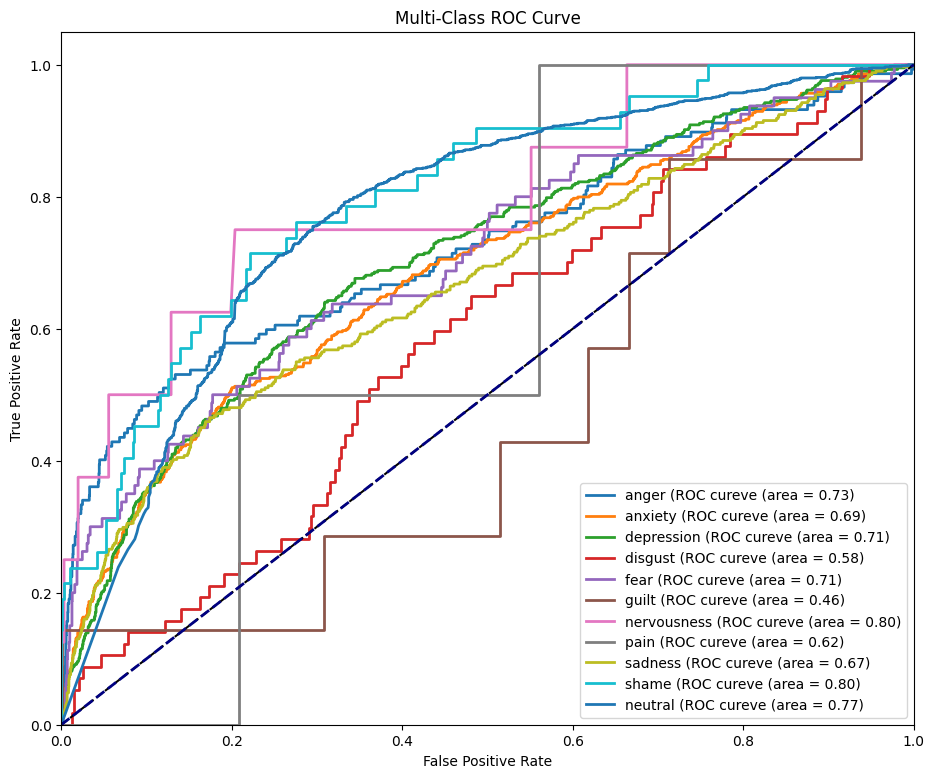

In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
plt.figure(figsize=(11, 9))

emotions = ['anger','anxiety','depression','disgust','fear','guilt', 'jealousy', 'nervousness', 'pain', 'sadness', 'shame', 'neutral']

test['emo_proba'] = None
for i in range(len(test)):
  test['emo_proba'][i] = eval(test['Emotion_dist'][i])[0]

k=0
for label in emotions:
  if label == 'jealousy':
    k += 1
  else:
    emo_proba_list = []
    true_list = []
    for j in range(len(test['emo_proba'])):
      emo_proba_list.append(test['emo_proba'][j][k])
      if test['emotion'][j]==label:
        true_list.append(1)
      else:
        true_list.append(0)


    # 임곗값에 따른 FPR, TPR 값을 반환 받음.
    fprs , tprs , thresholds = roc_curve(true_list ,emo_proba_list)
    roc_auc = roc_auc_score(true_list ,emo_proba_list)


    # ROC Curve를 plot 곡선으로 그림.
    # 가운데 대각선 직선을 그림.
    plt.plot(fprs, tprs, lw=2, label=f'{label} (ROC cureve (area = {roc_auc:.2f})')
    k += 1

# 그래프 설정
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [5]:
test['strat_proba'] = None
for i in range(len(test)):
  test['strat_proba'][i] = eval(test['Strategy_dist'][i])[0]

<ipython-input-5-25c0a40174c2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['strat_proba'][i] = eval(test['Strategy_dist'][i])[0]


In [ ]:

proba_list = []
true_list = []
for j in range(len(test['strat_proba'])):
  proba_list.append(test['strat_proba'][j][k])
  if test['strategy'][j]=='Information':
    true_list.append(1)
  else:
    true_list.append(0)

<ipython-input-80-e5e4ead7f5cd>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['strat_proba'][i] = eval(test['Strategy_dist'][i])[0]


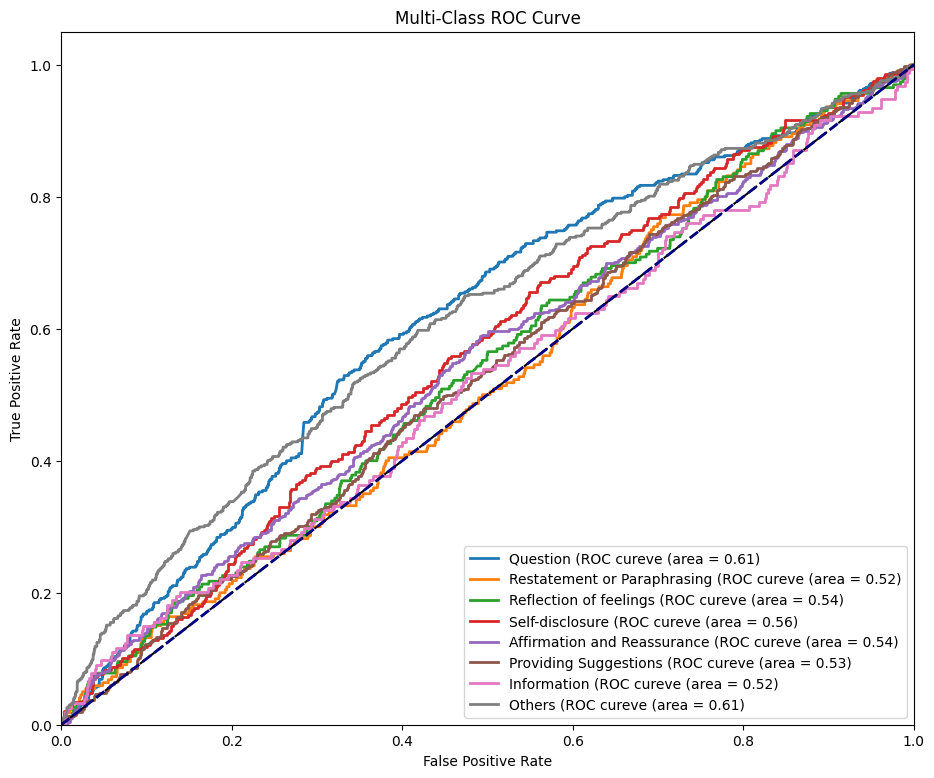

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
plt.figure(figsize=(11, 9))


strateges = ["Question","Restatement or Paraphrasing","Reflection of feelings","Self-disclosure","Affirmation and Reassurance","Providing Suggestions","Information","Others"]


test['strat_proba'] = None
for i in range(len(test)):
  test['strat_proba'][i] = eval(test['Strategy_dist'][i])[0]

k=0
for label in strateges:
    proba_list = []
    true_list = []
    for j in range(len(test['strat_proba'])):
      proba_list.append(test['strat_proba'][j][k])
      if test['strategy'][j]==label:
        true_list.append(1)
      else:
        true_list.append(0)


    # 임곗값에 따른 FPR, TPR 값을 반환 받음.
    fprs , tprs , thresholds = roc_curve(true_list ,proba_list)
    roc_auc = roc_auc_score(true_list ,proba_list)


    # ROC Curve를 plot 곡선으로 그림.
    # 가운데 대각선 직선을 그림.
    plt.plot(fprs, tprs, lw=2, label=f'{label} (ROC cureve (area = {roc_auc:.2f})')
    k += 1

# 그래프 설정
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc='lower right')
plt.show()

<ipython-input-81-77d3ad76dede>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['i_proba'][i] = eval(test['Intensity_dist'][i])[0]


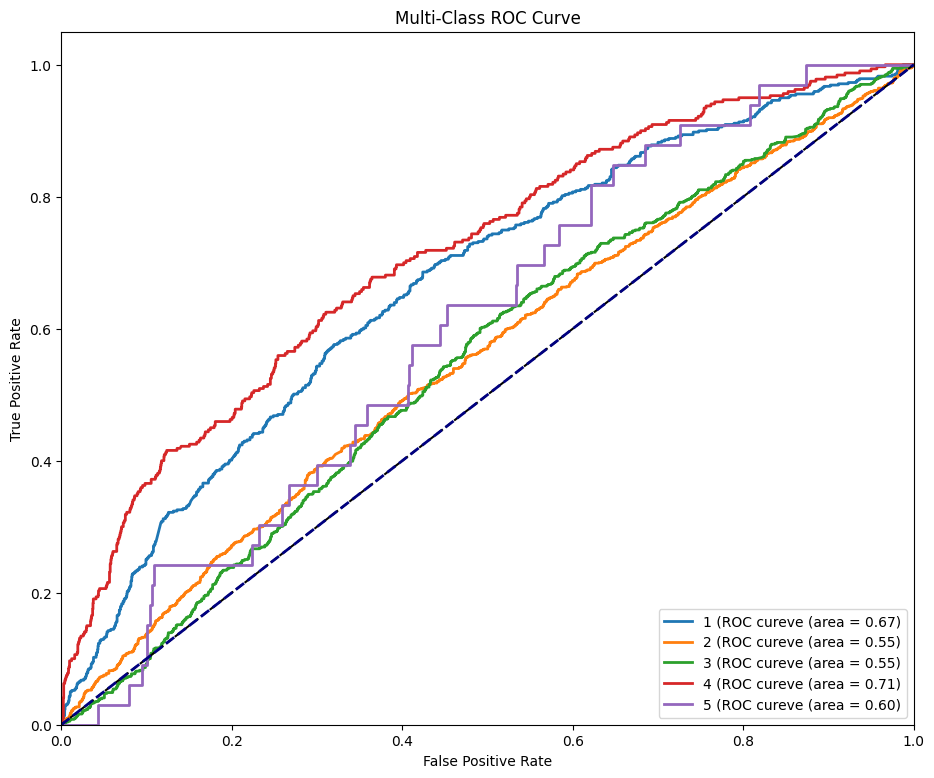

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
plt.figure(figsize=(11, 9))


intensity = [1,2,3,4,5]


test['i_proba'] = None
for i in range(len(test)):
  test['i_proba'][i] = eval(test['Intensity_dist'][i])[0]

k=1
for label in intensity:
    proba_list = []
    true_list = []
    for j in range(len(test['i_proba'])):
      proba_list.append(test['i_proba'][j][k])
      if test['intensity'][j]==label:
        true_list.append(1)
      else:
        true_list.append(0)


    # 임곗값에 따른 FPR, TPR 값을 반환 받음.
    fprs , tprs , thresholds = roc_curve(true_list ,proba_list)
    roc_auc = roc_auc_score(true_list ,proba_list)


    # ROC Curve를 plot 곡선으로 그림.
    # 가운데 대각선 직선을 그림.
    plt.plot(fprs, tprs, lw=2, label=f'{label} (ROC cureve (area = {roc_auc:.2f})')
    k += 1

# 그래프 설정
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc='lower right')
plt.show()